# C15: Ploting Metrics of Training Process

Summary:

    1. history = model.fit() fit function will return a dict containing 'acc', 'loss', 'val_acc', 'val_loss' 
    2. You can plot get training history data by history.history['acc']

## 1.Preparation

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np

# fix random seed
seed = 7
np.random.seed(seed)

# load and split dataset
dataset = np.loadtxt("./data_set/pima-indians-diabetes.data", delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:, 8]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

# define create model
def create_nn():
    model = Sequential()
    model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
    model.add(Dense(8, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Using Theano backend.


## 2. Plot Training History Data

In [2]:
model = create_nn()

# get history data
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), nb_epoch=150, batch_size=10, verbose=0)
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


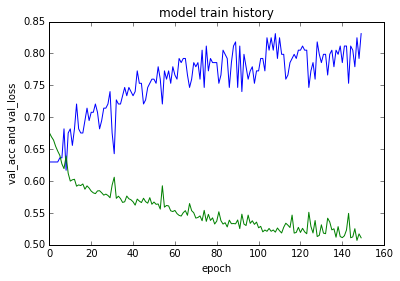

In [4]:
# in MacOs system, the backend of matplotlib shoud be change to TkAgg
# import matplotlib as mpl
# mpl.use('TkAgg')

import matplotlib.pyplot as plt
# set to plot at ipython notebook
%matplotlib inline  

plt.subplot(111)
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.ylabel('val_acc and val_loss')
plt.xlabel('epoch')
plt.title('model train history')
plt.show()